In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
( X_train, y_train ), ( X_test, y_test ) = tf.keras.datasets.mnist.load_data( )

In [3]:
print( len( X_train ) )
print( len( X_test ) )

60000
10000


In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

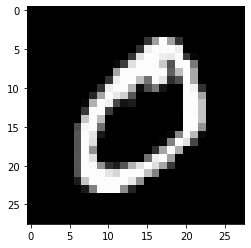

In [6]:
plt.imshow( X_train[1], cmap = "gray" )

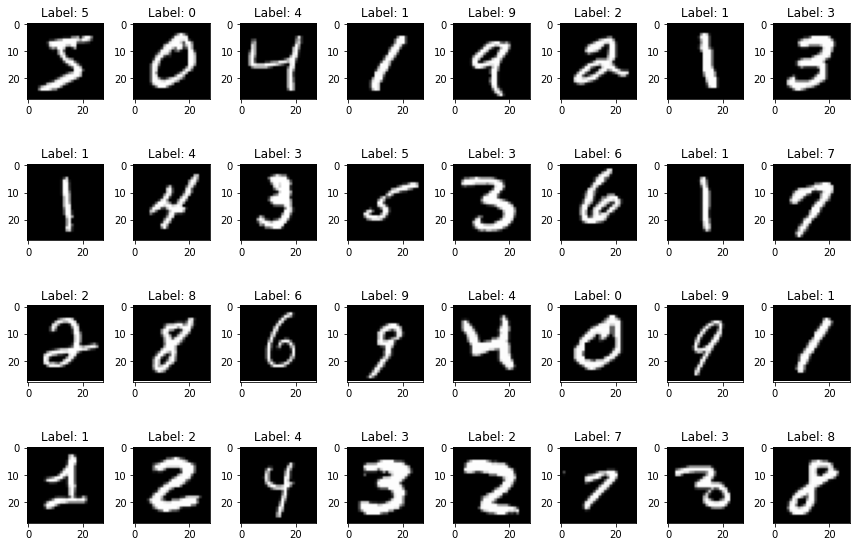

In [7]:
num_rows = 4
num_cols = 8
num = num_rows * num_cols

images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
for i in range( num ):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow( images[i], cmap='gray' )
    ax.set_title( "Label: {}".format( labels[i] ) )
plt.tight_layout( )
plt.show( )

In [8]:
# flattening my input variables into input vectors of size 784.
X_train_flattened = X_train.reshape( len( X_train ), 28 * 28 )
X_test_flattened = X_test.reshape( len( X_test ), 28 * 28 )

X_train_flattened = X_train_flattened.astype( "float" )
X_test_flattened = X_test_flattened.astype( "float" )

In [9]:
# Normalizing the input within the range [0, 1]
X_train_flattened /= 255
X_test_flattened /= 255

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense( units = 256, input_shape = ( 784, ), activation = "relu",
                           kernel_regularizer = tf.keras.regularizers.L2( 0.01 ), name = "layer_1" ),
    tf.keras.layers.Dense( units = 128, activation = "relu",
                           kernel_regularizer = tf.keras.regularizers.L2( 0.01 ), name = "layer_2" ),
    tf.keras.layers.Dense( units = 64, activation = "relu", name = "layer_3" ),
    tf.keras.layers.Dense( units = 10, name = "output_layer" )
] )

In [12]:
model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True ),
               optimizer = "adam",
               metrics = ["accuracy"] )

In [13]:
model.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit( X_train_flattened, y_train, batch_size = 64, epochs = 10, validation_split = 0.15 )
# in this case, 51000 samples will be used to train the model and evaluate the training loss,
# whereas 9000 (15% of the training set) samples are used to evaluate the model on validation set.

Epoch 1/10
797/797 [==============================] - 5s 4ms/step - loss: 1.0231 - accuracy: 0.8908 - val_loss: 0.4429 - val_accuracy: 0.9444
Epoch 2/10
797/797 [==============================] - 3s 3ms/step - loss: 0.4257 - accuracy: 0.9333 - val_loss: 0.3928 - val_accuracy: 0.9368
Epoch 3/10
797/797 [==============================] - 3s 3ms/step - loss: 0.3561 - accuracy: 0.9432 - val_loss: 0.2969 - val_accuracy: 0.9606
Epoch 4/10
797/797 [==============================] - 3s 3ms/step - loss: 0.3126 - accuracy: 0.9515 - val_loss: 0.2941 - val_accuracy: 0.9531
Epoch 5/10
797/797 [==============================] - 3s 3ms/step - loss: 0.2915 - accuracy: 0.9532 - val_loss: 0.2665 - val_accuracy: 0.9592
Epoch 6/10
797/797 [==============================] - 3s 3ms/step - loss: 0.2776 - accuracy: 0.9541 - val_loss: 0.2501 - val_accuracy: 0.9632
Epoch 7/10
797/797 [==============================] - 3s 3ms/step - loss: 0.2638 - accuracy: 0.9577 - val_loss: 0.2345 - val_accuracy: 0.9640
Epoch 

In [15]:
model.evaluate( X_test_flattened, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.2402 - accuracy: 0.9584


[0.24023698270320892, 0.9584000110626221]

### Interpreting the results
So, it can be observed that the `training accuracy` is 95.86%, `validation accuracy` is 96.18%, and `testing accuracy` is 95.84%.
The difference in the training, validation, and test losses is not that much, so the model is neither overfitting nor underfitting the training set (not very complex model).

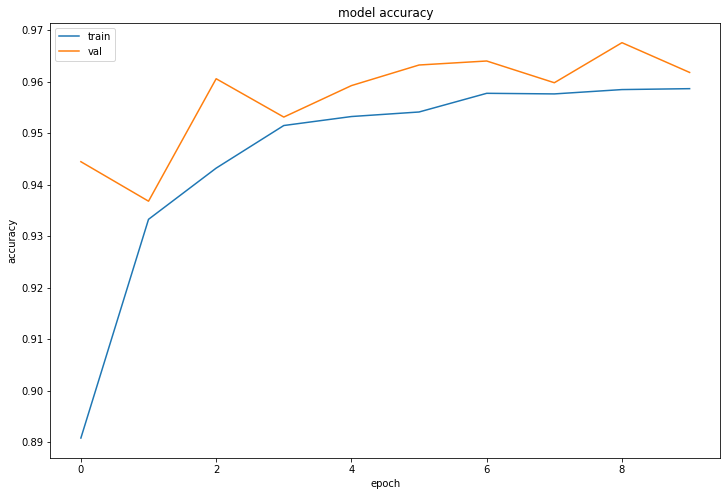

In [16]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

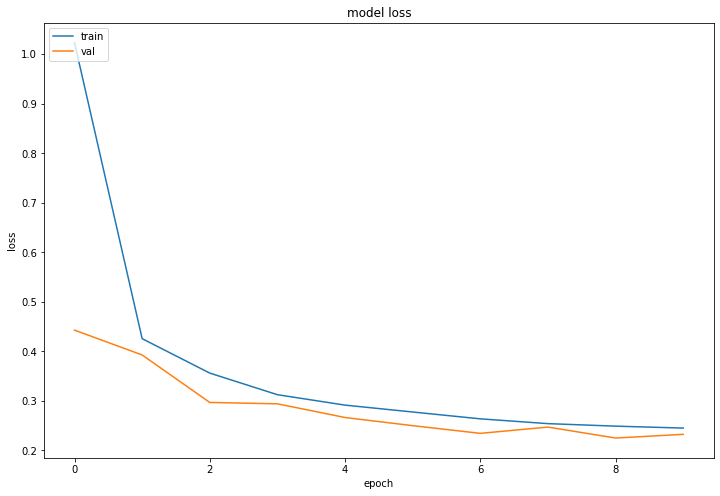

In [17]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Observing the test set

In [18]:
logits = model( X_test_flattened )
y_pred = tf.nn.softmax( logits )

In [19]:
y_pred[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1423355e-05, 4.7544643e-05, 1.9789480e-03, 3.4025859e-03,
       1.0806765e-07, 9.5046453e-05, 1.2989914e-09, 9.9425620e-01,
       7.2119517e-05, 1.3604354e-04], dtype=float32)>

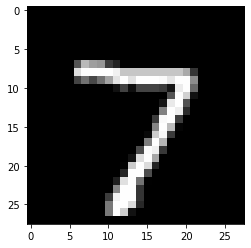

In [20]:
plt.imshow( X_test[0], cmap = "gray" )

In [21]:
y_test[0]

7

In [22]:
y_predictions = [np.argmax( i ) for i in y_pred]
y_predictions[0]

7

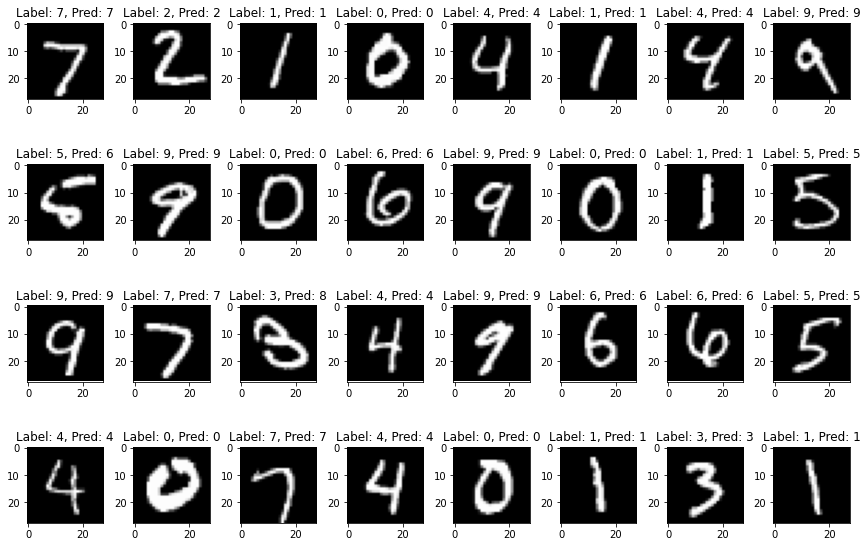

In [23]:
num_rows = 4
num_cols = 8
num = num_rows * num_cols

images = X_test[:num]
labels = y_test[:num]
predictions = y_predictions[:num]

# plot images
fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
for i in range( num ):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow( images[i], cmap='gray' )
    ax.set_title( "Label: {}, Pred: {}".format( labels[i], predictions[i] ) )
plt.tight_layout( )
plt.show( )

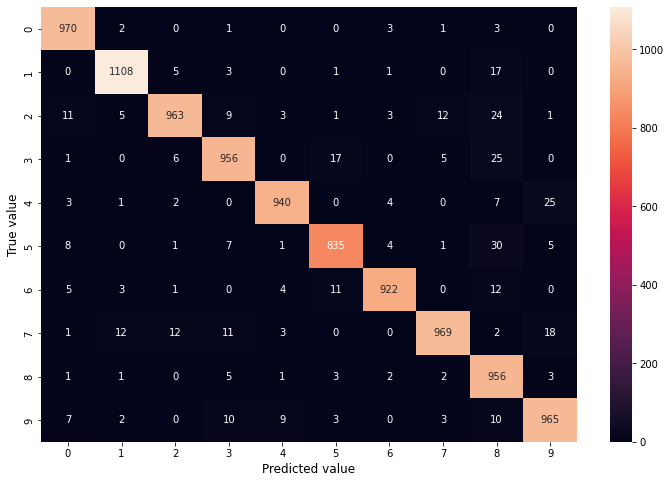

In [24]:
import seaborn as sns

cfm = tf.math.confusion_matrix( labels = y_test, predictions = y_predictions, num_classes = 10 )

plt.figure( figsize = ( 12, 8 ) )
sns.heatmap( cfm, annot = True, fmt = 'd' )
plt.xlabel( "Predicted value", fontsize = 12 )
plt.ylabel( "True value", fontsize = 12 )
plt.show( )

## Re-training the model with more neurons in layers without regularization

In [25]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense( units = 512, input_shape = ( 784, ), activation = "relu",
                           name = "layer_1" ),
    tf.keras.layers.Dense( units = 256, activation = "relu",
                           name = "layer_2" ),
    tf.keras.layers.Dense( units = 128, activation = "relu", name = "layer_3" ),
    tf.keras.layers.Dense( units = 10, name = "output_layer" )
] )

model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True ),
               optimizer = "adam",
               metrics = ["accuracy"] )

history = model.fit( X_train_flattened, y_train, batch_size = 64, epochs = 10, validation_split = 0.15 )
# again, 51000 samples will be used to train the model and evaluate the training loss,
# whereas 9000 (15% of the training set) samples are used to evaluate the model on validation set.

Epoch 1/10
797/797 [==============================] - 4s 5ms/step - loss: 0.2256 - accuracy: 0.9320 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 2/10
797/797 [==============================] - 3s 4ms/step - loss: 0.0888 - accuracy: 0.9730 - val_loss: 0.0904 - val_accuracy: 0.9723
Epoch 3/10
797/797 [==============================] - 3s 3ms/step - loss: 0.0610 - accuracy: 0.9799 - val_loss: 0.0758 - val_accuracy: 0.9768
Epoch 4/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0855 - val_accuracy: 0.9771
Epoch 5/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0905 - val_accuracy: 0.9763
Epoch 6/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0762 - val_accuracy: 0.9797
Epoch 7/10
797/797 [==============================] - 2s 3ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0831 - val_accuracy: 0.9797
Epoch 

In [26]:
model.evaluate( X_test_flattened, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9807


[0.07637161016464233, 0.9807000160217285]

### Interpreting the results
So, it can be observed that the `training accuracy` is 99.35%, `validation accuracy` is 98.06%, and `testing accuracy` is 98.07%.

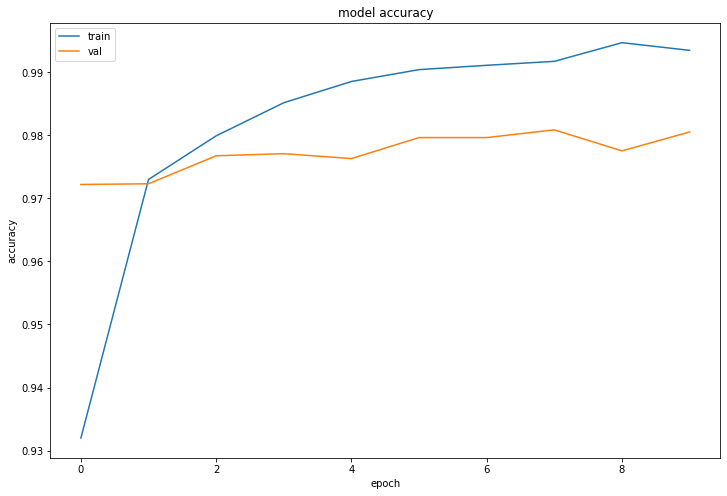

In [27]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

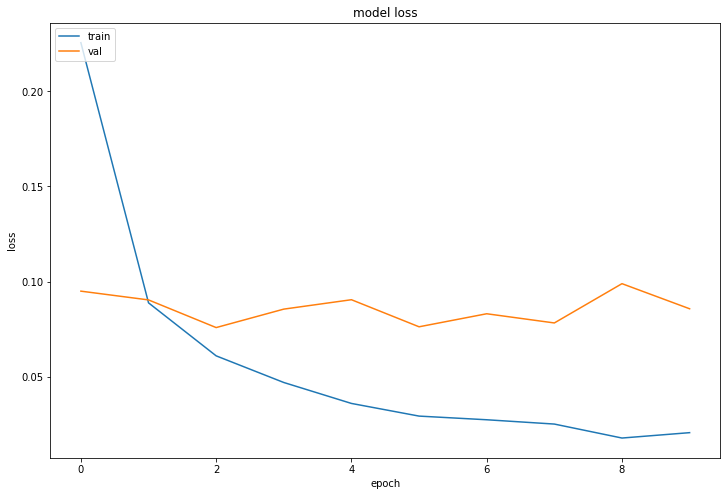

In [28]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

From the graphs above it seems that the `training loss` of the model is much smaller than the `cross-validation loss` of the validation set: almost 5 times less. However, it is assumed that this is not an indication of the overfit of the model, because the model performs with almost the same loss on both validation and testing sets.

### Observing the test set

In [29]:
logits = model( X_test_flattened )
y_pred = tf.nn.softmax( logits )

y_predictions = [np.argmax( i ) for i in y_pred]

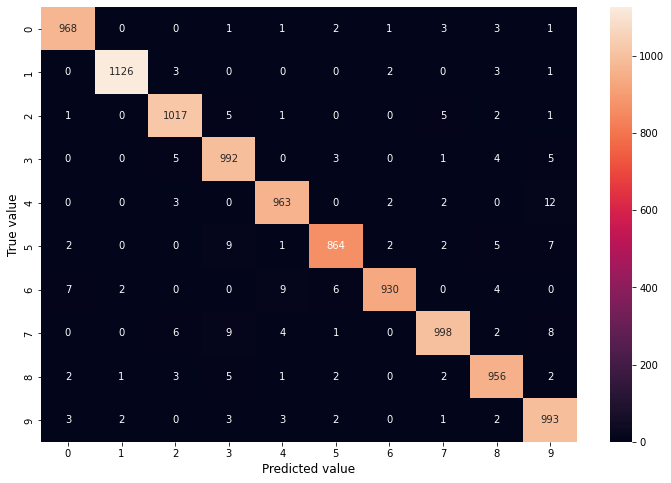

In [30]:
cfm = tf.math.confusion_matrix( labels = y_test, predictions = y_predictions, num_classes = 10 )

plt.figure( figsize = ( 12, 8 ) )
sns.heatmap( cfm, annot = True, fmt = 'd' )
plt.xlabel( "Predicted value", fontsize = 12 )
plt.ylabel( "True value", fontsize = 12 )
plt.show( )

The new model is much better than the previous one, as shown in the above confusion matrix.

## Re-training the model with additional Dropout layers.

In [45]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense( units = 512, activation = "relu", input_shape = ( 784, ),
                           name = "layer_1" ),
    tf.keras.layers.Dropout( 0.4, name = "dropout_1" ),
    tf.keras.layers.Dense( units = 256, activation = "relu",
                           name = "layer_2" ),
    tf.keras.layers.Dropout( 0.4, name = "dropout_2" ),
    tf.keras.layers.Dense( units = 128, activation = "relu", name = "layer_3" ),
    tf.keras.layers.Dropout( 0.4, name = "dropout_3" ),
    tf.keras.layers.Dense( units = 10, name = "output_layer" )
    
] )

model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True ),
               optimizer = "Adam",
               metrics = ["accuracy"] )

model.summary( )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 layer_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 10)               

In [46]:
history = model.fit( X_train_flattened, y_train, epochs = 10, batch_size = 64, validation_split = 0.15 )

Epoch 1/10
797/797 [==============================] - 4s 4ms/step - loss: 0.4123 - accuracy: 0.8731 - val_loss: 0.1340 - val_accuracy: 0.9603
Epoch 2/10
797/797 [==============================] - 3s 3ms/step - loss: 0.1885 - accuracy: 0.9461 - val_loss: 0.1040 - val_accuracy: 0.9700
Epoch 3/10
797/797 [==============================] - 3s 4ms/step - loss: 0.1455 - accuracy: 0.9580 - val_loss: 0.0814 - val_accuracy: 0.9750
Epoch 4/10
797/797 [==============================] - 4s 5ms/step - loss: 0.1251 - accuracy: 0.9631 - val_loss: 0.0867 - val_accuracy: 0.9770
Epoch 5/10
797/797 [==============================] - 3s 4ms/step - loss: 0.1106 - accuracy: 0.9679 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 6/10
797/797 [==============================] - 3s 4ms/step - loss: 0.0994 - accuracy: 0.9711 - val_loss: 0.0715 - val_accuracy: 0.9807
Epoch 7/10
797/797 [==============================] - 3s 4ms/step - loss: 0.0896 - accuracy: 0.9731 - val_loss: 0.0751 - val_accuracy: 0.9802
Epoch 

In [47]:
model.evaluate( X_test_flattened, y_test )

313/313 [==============================] - 2s 6ms/step - loss: 0.0698 - accuracy: 0.9809


[0.06978679448366165, 0.98089998960495]

### Interpreting the results

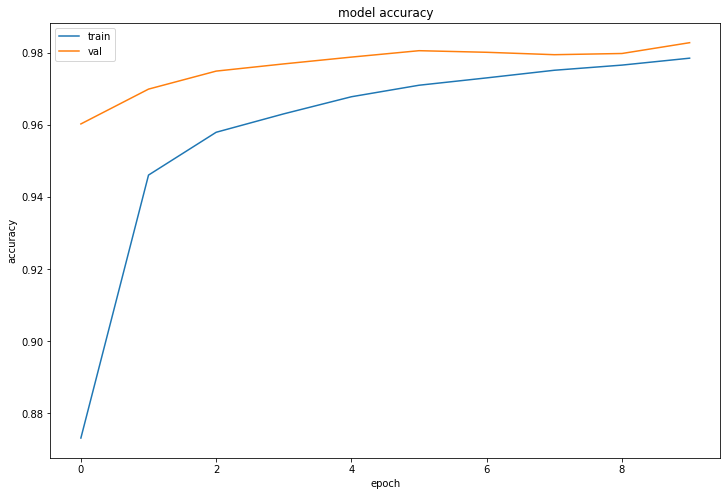

In [48]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

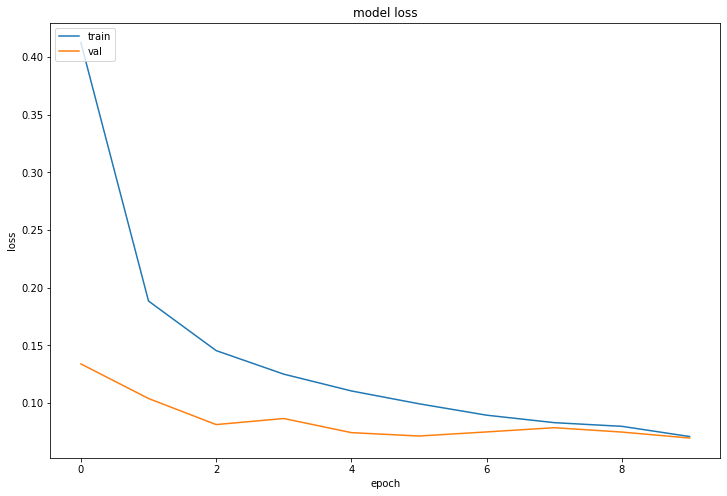

In [49]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Observing the test set

In [50]:
logits = model( X_test_flattened )
y_pred = tf.nn.softmax( logits )

y_predictions = [np.argmax( i ) for i in y_pred]

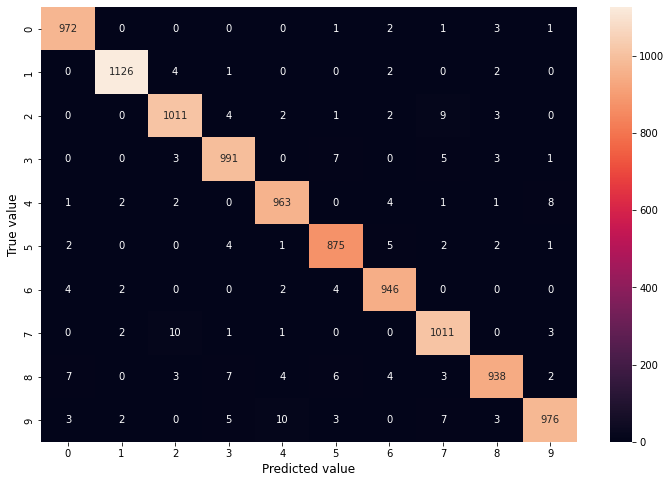

In [51]:
cfm = tf.math.confusion_matrix( labels = y_test, predictions = y_predictions, num_classes = 10 )

plt.figure( figsize = ( 12, 8 ) )
sns.heatmap( cfm, annot = True, fmt = 'd' )
plt.xlabel( "Predicted value", fontsize = 12 )
plt.ylabel( "True value", fontsize = 12 )
plt.show( )

I believe this model does the **best** job recognizing handwritten digits, as it has high accuracy and neither overfits nor underfits the training data, because the loss values for `training`, `cross-validation`, and `test` sets are relatively equal.